# STATISTICS

### : Random Variable and Probability

#### Q1] In a class of 100 students; find the probability that a random student is picked whose score is less than 70 marks?
#### mean=50, sd=20 also find who scored more than 80?

In [1]:
from scipy import stats
stats.norm.cdf(x=70, loc=50, scale=20) #cdf = cummulative distribution function

0.8413447460685429

In [2]:
1 - stats.norm.cdf(x=80, loc=50, scale=20)

0.06680720126885809

#### Q2] Suppose GMAT score can be reasonably modeled usinhg normal distribution mean=711 sd=29. What is p(X<=680)? P(670<X<740)?

In [3]:
from scipy import stats
stats.norm.cdf(x=680, loc=711, scale=29)

0.14254260383881612

In [4]:
stats.norm.cdf(x=670, loc=711, scale=29)

0.07871132954479027

In [5]:
stats.norm.cdf(x=740, loc=711, scale=29)

0.8413447460685429

In [6]:
0.8413-0.0787 #students scored between 670 and 740

0.7626000000000001

## : Normal Distribution

In [7]:
import pandas as pd

In [8]:
beml = pd.read_csv('A:/pandas/BEML.csv')
glaxo = pd.read_csv('A:/pandas/GLAXO.csv')

In [9]:
beml.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2010-01-04,1121.0,1151.00,1121.00,1134.0,1135.60,101651.0,1157.18
1,2010-01-05,1146.8,1149.00,1128.75,1135.0,1134.60,59504.0,676.47
2,2010-01-06,1140.0,1164.25,1130.05,1137.0,1139.60,128908.0,1482.84
3,2010-01-07,1142.0,1159.40,1119.20,1141.0,1144.15,117871.0,1352.98
4,2010-01-08,1156.0,1172.00,1140.00,1141.2,1144.05,170063.0,1971.42


In [10]:
glaxo.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2010-01-04,1613.00,1629.10,1602.00,1629.0,1625.65,9365.0,151.74
1,2010-01-05,1639.95,1639.95,1611.05,1620.0,1616.80,38148.0,622.58
2,2010-01-06,1618.00,1644.00,1617.00,1639.0,1638.50,36519.0,595.09
3,2010-01-07,1645.00,1654.00,1636.00,1648.0,1648.70,12809.0,211.00
4,2010-01-08,1650.00,1650.00,1626.55,1640.0,1639.80,28035.0,459.11


### Data Filtering

In [11]:
beml_data = beml.loc[:,['Date','Close']]
beml_data

,Date,Close
0,2010-01-04,1135.60
1,2010-01-05,1134.60
2,2010-01-06,1139.60
3,2010-01-07,1144.15
4,2010-01-08,1144.05
...,...,...
1734,2016-12-26,950.25
1735,2016-12-27,975.70
1736,2016-12-28,974.40
1737,2016-12-29,986.05


In [12]:
glaxo_data = glaxo.loc[:,['Date', 'Close']]
glaxo_data

,Date,Close
0,2010-01-04,1625.65
1,2010-01-05,1616.80
2,2010-01-06,1638.50
3,2010-01-07,1648.70
4,2010-01-08,1639.80
...,...,...
1734,2016-12-26,2723.50
1735,2016-12-27,2701.75
1736,2016-12-28,2702.15
1737,2016-12-29,2727.90


In [13]:
import matplotlib.pyplot as plt

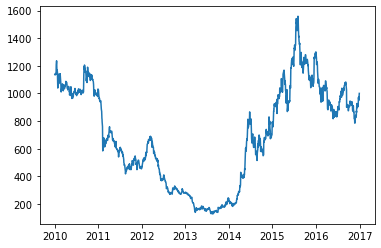

In [28]:
plt.plot(beml_data.Date, beml_data.Close)

In [15]:
beml_data.Date = pd.to_datetime(beml_data.Date)

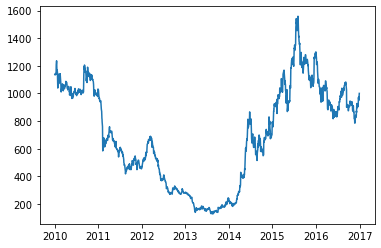

In [16]:
plt.plot(beml_data.Date, beml_data.Close)

In [17]:
beml.dtypes # bcoz of date data type is object the first graph do not show the x-axis plot names

Date                     object
Open                    float64
High                    float64
Low                     float64
Last                    float64
Close                   float64
Total Trade Quantity    float64
Turnover (Lacs)         float64
dtype: object

In [18]:
beml_data.dtypes

Date     datetime64[ns]
Close           float64
dtype: object

### Understand Gain Percentage

In [30]:
glaxo_data['Gain'] = glaxo_data.Close.pct_change(periods=1)
beml_data['Gain'] = beml_data.Close.pct_change(periods=1)

In [20]:
glaxo_data

,Date,Close,Gain
0,2010-01-04,1625.65,NaN
1,2010-01-05,1616.80,-0.005444
2,2010-01-06,1638.50,0.013422
3,2010-01-07,1648.70,0.006225
4,2010-01-08,1639.80,-0.005398
...,...,...,...
1734,2016-12-26,2723.50,-0.001283
1735,2016-12-27,2701.75,-0.007986
1736,2016-12-28,2702.15,0.000148
1737,2016-12-29,2727.90,0.009529


In [21]:
glaxo_data.dropna(inplace=True)

In [22]:
glaxo_data

,Date,Close,Gain
1,2010-01-05,1616.80,-0.005444
2,2010-01-06,1638.50,0.013422
3,2010-01-07,1648.70,0.006225
4,2010-01-08,1639.80,-0.005398
5,2010-01-11,1629.45,-0.006312
...,...,...,...
1734,2016-12-26,2723.50,-0.001283
1735,2016-12-27,2701.75,-0.007986
1736,2016-12-28,2702.15,0.000148
1737,2016-12-29,2727.90,0.009529


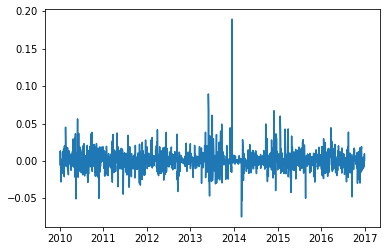

In [29]:
plt.plot(glaxo_data.Date, glaxo_data.Gain)

In [24]:
glaxo_data.dtypes

Date      object
Close    float64
Gain     float64
dtype: object

In [25]:
glaxo_data['Date'] = pd.to_datetime(glaxo_data['Date'])

In [26]:
glaxo_data.dtypes

Date     datetime64[ns]
Close           float64
Gain            float64
dtype: object

Text(0, 0.5, 'Gain')

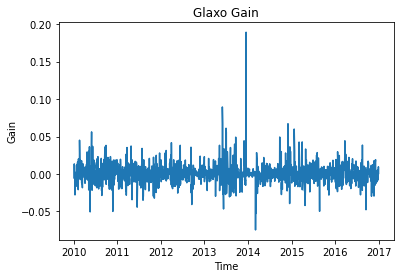

In [27]:
plt.plot(glaxo_data.Date, glaxo_data.Gain)
plt.title('Glaxo Gain')
plt.xlabel('Time')
plt.ylabel('Gain')

### Reflections

#### Q1] Probability of making 2% or higher loss in glaxo

In [31]:
glaxo_data.Gain.mean()

0.00038939745411689956

In [32]:
glaxo_data.Gain.std()

0.01336365313220506

In [38]:
stats.norm.cdf(x= -0.02, loc= 0.00038, scale= 0.013)

0.05847647887352041

In [37]:
stats.norm.cdf(x= -0.02, loc = glaxo_data.Gain.mean(), scale = glaxo_data.Gain.std())

0.06353789851454293

#### Q2] Probability of making 2% or higher gain in glaxo

In [41]:
1 - stats.norm.cdf(x= 0.02, loc = glaxo_data.Gain.mean(), scale = glaxo_data.Gain.std())

0.07112572432274356

#### Q3] Probability of making 2% or higher loss in beml

In [42]:
stats.norm.cdf(x= -0.02, loc = beml_data.Gain.mean(), scale = beml_data.Gain.std())

0.22155987503755292

#### Q4] Probability of making 2% or higher gain in beml

In [43]:
1-stats.norm.cdf(x= -0.02, loc = beml_data.Gain.mean(), scale = beml_data.Gain.std())

0.7784401249624471